<a href="https://colab.research.google.com/github/fernandodeeke/curso_python/blob/main/regressao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1></h1></center>
<center><h1>Aprendendo Matemática com Python</h1></center>
<center><h2>2025/1</h2></center>
<center><h3>Técnicas de Regressão com Scikit-learn</h3></center>
<center><h5> Fernando D. Sasse e Sidnei Furtado <br>
 CCT UDESC
</h5></center>

O módulo sklearn, também conhecido como Scikit-learn, é uma das bibliotecas mais populares de aprendizado de máquina (machine learning) em Python. Ele oferece ferramentas eficientes e simples para análise preditiva e mineração de dados, construído sobre bibliotecas como NumPy, SciPy e matplotlib.

## Parte 1: Regressão Univariada

Mostraremos agora como usar o módulo sklearn (scikit-learn), num exemplo que envolve a previsão do número de seguidores com base em horas na rede social. Inicialmente importamos as bibliotecas:

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Suponhamos que temos os seguintes dados de usuários:

In [50]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)

# Número de seguidores (variável dependente)
y = np.array([100, 130, 200, 250, 310, 350, 430, 430, 509, 520])

Notemos acima que ao usar essa  biblioteca, a variável independente sempre deverá convertida para uma matriz coluna (que denotaremos por um letra maiúscula), enquanto que a variável dependente permanece um 1-array (letra minúscula):

In [51]:
np.shape(X)

(10, 1)

In [52]:
np.shape(y)

(10,)

O jargão comum na regressão linear deriva de sua já clássica aplicação, que é aprendizado de máquina. Falamos em criar e treinar o modelo:

In [53]:
# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo com os dados
modelo.fit(X, y)

LinearRegression()

Examinemos os resultados:

In [54]:
# Coeficiente angular (inclinação da reta)
coef_angular = modelo.coef_[0]

# Coeficiente linear (intercepto)
coef_linear = modelo.intercept_

# Coeficiente de determinação
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
MSE = mean_squared_error(y, y_pred)

print(f'Coeficiente angular (inclinação): {coef_angular:.2f}')
print(f'Coeficiente linear (intercepto): {coef_linear:.2f}')
print(f'Erro quadrático médio (MSE):  {MSE:.4f}')
print(f"Coeficiente de determinação (r²): {r2:.4f}")

Coeficiente angular (inclinação): 49.47
Coeficiente linear (intercepto): 50.80
Erro quadrático médio (MSE):  271.3964
Coeficiente de determinação (r²): 0.9867


Os resultados indicam que 98,67% da incerteza original foi explicada por esse modelo. Esse resultado confirma a conclusão de que a equação quadrática representa um bom ajuste, como também é evidente a partir do gráfico. Visualizemos os resultados:

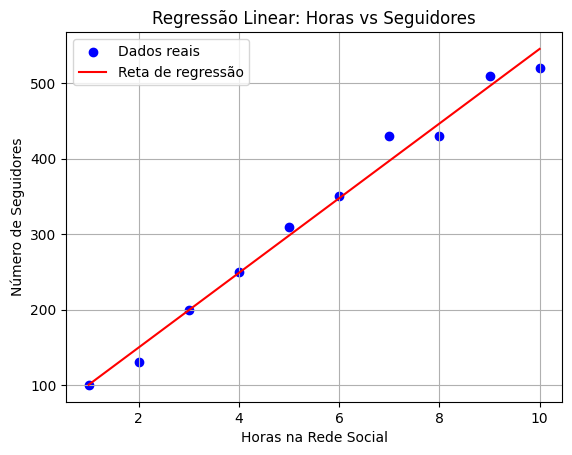

In [55]:
# Plotar os dados e a linha de regressão
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, y_pred, color='red', label='Reta de regressão')
plt.xlabel('Horas na Rede Social')
plt.ylabel('Número de Seguidores')
plt.title('Regressão Linear: Horas vs Seguidores')
plt.legend()
plt.grid(True)
plt.show()

Façamos previsões para alguns casos:

In [56]:
# Prever o número de seguidores para 11 horas
horas = np.array([[11], [15]])
seguidores_previstos = modelo.predict(horas)

print(f'Número previsto de seguidores para 11 horas: {seguidores_previstos[0]:.0f}')
print(f'Número previsto de seguidores para 15 horas: {seguidores_previstos[1]:.0f}')

Número previsto de seguidores para 11 horas: 595
Número previsto de seguidores para 15 horas: 793


### Exemplo 2
**Sklearn com regressão simples**

Vejamos mais um exemplo para estabelecer a aplicação do módulo.


In [24]:
# Importamos os módulos necessários
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Geramos dados sintéticos (reta com ruído)
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # 100 amostras entre 0 e 2
y = (4 + 3 * X + np.random.randn(100, 1)).flatten()  # y = 4 + 3x + ruído

In [30]:
# Notemos que
np.shape(y)

(100,)

In [31]:
np.shape(X)

(100, 1)

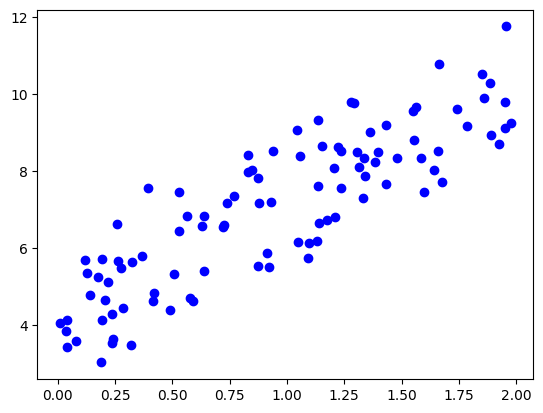

In [32]:
# Façamos uma pré-visualização dos dados
plt.scatter(X, y, color='blue')

In [33]:
# Usemos simples regressão linear
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

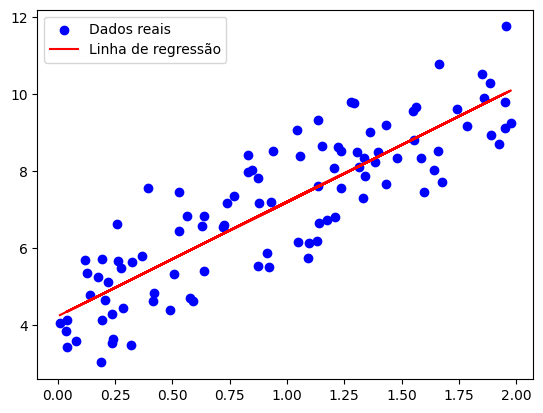

In [34]:
plt.scatter(X, y, color='blue',label='Dados reais')
plt.plot(X, y_pred, color='red', label='Linha de regressão')
plt.legend()
plt.show()

In [38]:
# Coeficiente angular (inclinação da reta)
coef_angular = modelo.coef_[0]

# Coeficiente linear (intercepto)
coef_linear = modelo.intercept_

# Coeficiente de determinação
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
MSE = mean_squared_error(y, y_pred)

print(f'Coeficiente angular (inclinação): {coef_angular:.2f}')
print(f'Coeficiente linear (intercepto): {coef_linear:.2f}')
print(f'Erro quadrático médio (MSE):  {MSE:.4f}')
print(f"Coeficiente de determinação (r²): {r2:.4f}")

Coeficiente angular (inclinação): 2.97
Coeficiente linear (intercepto): 4.22
Erro quadrático médio (MSE):  0.9924
Coeficiente de determinação (r²): 0.7470


No aprendizado de máquina, a divisão dos dados em conjuntos de **treino** e **teste** é uma prática fundamental para avaliar o desempenho de um modelo preditivo. O objetivo é garantir que o modelo não apenas se ajuste bem aos dados usados para seu treinamento, mas também generalize para dados novos e não vistos. Esta seção explica a teoria por trás dessa divisão, destacando sua importância e considerações práticas.

A divisão treino/teste consiste em separar o conjunto de dados disponível em duas partes:

- **Conjunto de treino**: Usado para ajustar o modelo, ou seja, para estimar os parâmetros do modelo (por exemplo, coeficientes em uma regressão linear).
- **Conjunto de teste**: Usado para avaliar o desempenho do modelo em dados não utilizados durante o treinamento, simulando sua performance em aplicações reais.

Seja $ D = \{(x_i, y_i)\}_{i=1}^N $ o conjunto de dados com $  N $ amostras, onde $ x_i $ são as variáveis preditoras e $ y_i $ é a variável alvo. A divisão treino/teste particiona $ D $ em:

- $ D_{\text{treino}}$, com $ N_{\text{treino}} $ amostras (geralmente 70%–80% de $ N $).
- $ D_{\text{teste}}$, com $ N_{\text{teste}} $ amostras (geralmente 20%–30% de $ N $).

A divisão é feita de forma aleatória, mas pode ser estratificada para manter a proporção de classes (em problemas de classificação) ou valores (em regressão).

O objetivo principal da divisão é avaliar a **generalização** do modelo. Um modelo que apresenta bom desempenho no conjunto de treino, mas desempenho ruim no conjunto de teste, sofre de *overfitting* (sobreajuste), ou seja, ele memorizou os dados de treino em vez de aprender padrões gerais. Por outro lado, um modelo com desempenho ruim em ambos os conjuntos pode estar subajustado (*underfitting*), indicando que é muito simples ou mal configurado.

O desempenho do modelo é medido usando métricas como:

- **Erro Quadrático Médio (MSE)** para regressão:
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2,
  $$
  onde $ \hat{y}_i $ é a previsão do modelo.
  
- **Coeficiente de Determinação ($ r^2 $)**: Mede a proporção da variância explicada pelo modelo.

Comparamos essas métricas no conjunto de treino e no conjunto de teste. Idealmente, o MSE no teste deve ser próximo ao do treino, e o$r^2 $ deve ser alto em ambos.

Notas:

- **Tamanho da divisão**: Uma proporção comum é 80% treino e 20% teste, mas isso depende do tamanho do conjunto de dados. Conjuntos pequenos podem exigir validação cruzada em vez de uma única divisão.
- **Aleatoriedade**: A divisão deve ser aleatória para evitar viés, mas fixar uma semente (*random seed*) garante reprodutibilidade.
- **Vazamento de dados**: O conjunto de teste deve ser completamente isolado durante o treinamento. Por exemplo, a padronização de dados deve usar apenas as estatísticas (média e desvio padrão) do conjunto de treino.

Em resumo, o procedimento é usado para:

- Evitar overfitting: evita que o modelo "decore" os dados. Com overfitting um modelo muito complexo que se ajusta ao ruído dos dados de treino.

- Avaliar o modelo: mostra o quão bem o modelo se comporta com dados reais.



### Exemplo 3
**Sklearn com treino/teste**


In [27]:
# Importamos os módulos necessários
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Geramos dados sintéticos (reta com ruído)
np.random.seed(0)
X = 2 * np.random.rand(100, 1)               # 100 amostras entre 0 e 2
y = (4 + 3 * X + np.random.randn(100, 1)).ravel()  # y com shape (100,)

In [29]:
# Dividimos os dados em treino (80%) e teste (20%)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Criamos e ajustamos o modelo
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

LinearRegression()

In [31]:
# Fazemos previsões no conjunto de teste e treino
y_pred_teste = modelo.predict(X_teste)
y_pred_treino = modelo.predict(X_treino)

In [32]:
# Avaliamos o modelo
r2_treino = r2_score(y_treino, y_pred_treino)
r2_teste = r2_score(y_teste, y_pred_teste)

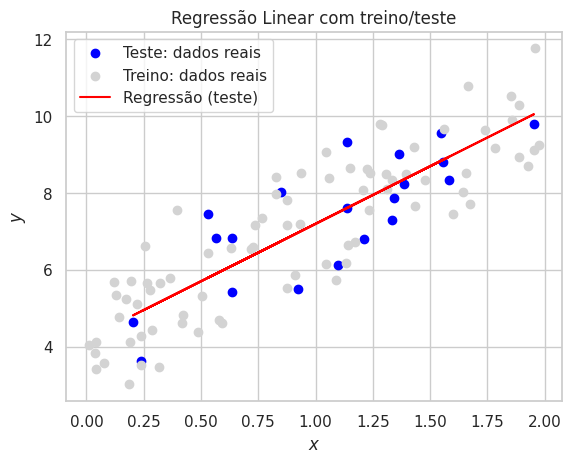

In [33]:
# Gráfico dos dados reais e da regressão
plt.scatter(X_teste, y_teste, color='blue', label='Teste: dados reais')
plt.scatter(X_treino, y_treino, color='lightgray', label='Treino: dados reais')
plt.plot(X_teste, y_pred_teste, color='red', label='Regressão (teste)')
plt.title('Regressão Linear com treino/teste')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.legend()
plt.show()

In [34]:
# Resultados numéricos
coef_angular = modelo.coef_[0]
coef_linear = modelo.intercept_

print(f'Coeficiente angular (inclinação): {coef_angular:.2f}')
print(f'Coeficiente linear (intercepto): {coef_linear:.2f}')
print(f"R² no conjunto de treino: {r2_treino:.4f}")
print(f"R² no conjunto de teste : {r2_teste:.4f}")

Coeficiente angular (inclinação): 2.99
Coeficiente linear (intercepto): 4.21
R² no conjunto de treino: 0.7598
R² no conjunto de teste : 0.6521


Notemos que $R^2> 0.6$ indica um cenário muito comum em modelos bem ajustados, mas não perfeitos. o valor 0.6 é geralmente considerado bom em muitos contextos aplicados (como marketing, economia, ciências sociais).

A diferença 0,7598−0,6521=0,107 não é excessiva. Isso sugere que o modelo:

- aprendeu bem os padrões gerais nos dados de treino;

- apresenta uma leve tendência ao overfitting, mas ainda generaliza de forma aceitável.

Em geral,

| Comportamento                            | Interpretação                                                                 |
|------------------------------------------|-------------------------------------------------------------------------------|
| $$ R^2_{\text{treino}} \approx R^2_{\text{teste}} $$: | Modelo simples e estável, com boa capacidade de generalização.               |
| $$ R^2_{\text{treino}} \gg R^2_{\text{teste}}: $$   | Overfitting: o modelo decorou os dados de treino e não generaliza bem.        |
| $$ R^2_{\text{treino}} \ll R^2_{\text{teste}}: $$     | Pode indicar subamostragem ou variabilidade alta nos dados de treino.   |
| Ambos baixos:                             | Underfitting: o modelo é muito simples ou inadequado para os dados.           |


## Parte 2: Regressão Multivariada

### Exemplo 4

**Regressão linear multivariada simples**

O arquivo Advertising.csv contém um conjunto de dados clássico usado para ilustrar modelos de regressão linear em problemas de previsão de vendas com base em investimentos publicitários. Ele aparece, em [2]. O Advertising Dataset contém informações sobre os investimentos em publicidade em três canais de mídia — TV, Rádio e Jornal — e as respectivas vendas de um produto em diferentes mercados. Cada linha representa dados de um mercado específico.

- TV: Investimento em publicidade na TV (em milhares de dólares).

- Radio: Investimento em publicidade no rádio (em milhares de dólares).

- Newspaper: Investimento em publicidade em jornais (em milhares de dólares).

- Sales: Vendas do produto (em milhares de unidades).

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [58]:
# Carregar o dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(url)

In [60]:
# Examinando os dados do dataset
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [62]:
# Sumario estatístico do dataset
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Notemos que a coluna 'Unnamed: 0' é apenas um índice e pode ser descartada. Selecionamos as variáveis independentes (investimentos em publicidade) e a variável dependente (vendas).

In [63]:
# Definir variáveis independentes e dependente
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [64]:
# Criar o modelo de regressão linear
modelo = LinearRegression()

# Ajustar o modelo aos dados
modelo.fit(X, y)

LinearRegression()

Após o treinamento, examinamos os resultados e o desempenho do modelo:

In [66]:
# Fazer previsões
y_pred = modelo.predict(X)

# Coeficientes do modelo
coeficientes = modelo.coef_
intercepto = modelo.intercept_

# Coeficiente de determinação R²
r2 = r2_score(y, y_pred)

# Exibir os resultados
print(f'Intercepto: {intercepto:.4f}')
print(f'Coeficientes: {coeficientes}')
print(f'Coeficiente de determinação (R²): {r2:.4f}')

Intercepto: 2.9389
Coeficientes: [ 0.04576465  0.18853002 -0.00103749]
Coeficiente de determinação (R²): 0.8972


Portanto, aproximadamente 89.72% da variabilidade nas vendas é explicada pelos investimentos em publicidade nos três canais.

Suponhamos que queremos prever as vendas para os seguintes investimentos:

- TV: 150 mil dólares
- Rádio: 22 mil dólares
- Jornal: 12 mil dólares

In [67]:
# Novo conjunto de dados para previsão (como DataFrame com nomes de colunas)
novo_investimento = pd.DataFrame([[150, 22, 12]], columns=['TV', 'radio', 'newspaper'])

# Previsão de vendas
venda_prevista = modelo.predict(novo_investimento)

print(f"Vendas previstas: {venda_prevista[0]:.2f} mil unidades")

Vendas previstas: 13.94 mil unidades


Podemos testar múltiplos conjuntos de dados de investimento:

In [68]:
# Múltiplos conjuntos de dados para previsão (com nomes de colunas)
novos_investimentos = pd.DataFrame([
    [150, 22, 12],
    [200, 30, 20],
    [100, 15, 10]
], columns=['TV', 'radio', 'newspaper'])

# Previsões de vendas
vendas_previstas = modelo.predict(novos_investimentos)

for i, pred in enumerate(vendas_previstas):
    print(f"Conjunto {i+1}: Vendas previstas = {pred:.2f} mil unidades")

Conjunto 1: Vendas previstas = 13.94 mil unidades
Conjunto 2: Vendas previstas = 17.73 mil unidades
Conjunto 3: Vendas previstas = 10.33 mil unidades


Podemos visualizar a relação entre as variáveis independentes e a variável dependente utilizando gráficos de dispersão:

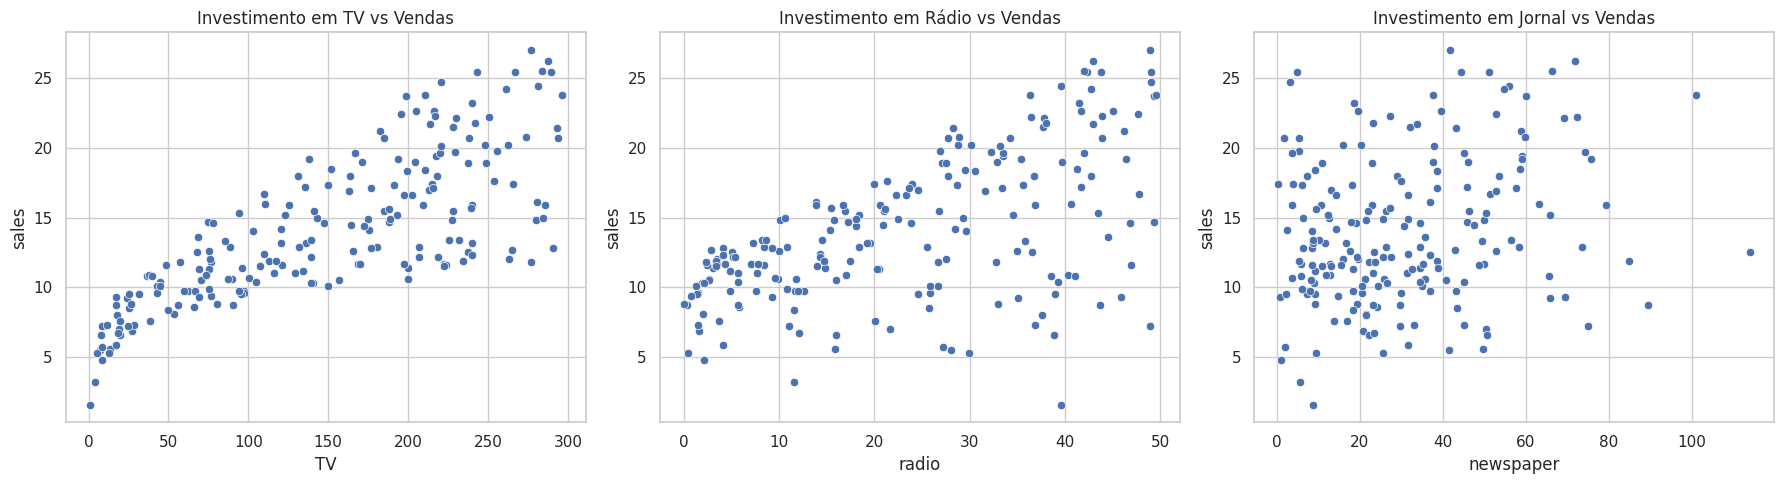

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar gráficos de dispersão para cada variável independente
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='TV', y='sales', data=df, ax=axs[0])
axs[0].set_title('Investimento em TV vs Vendas')

sns.scatterplot(x='radio', y='sales', data=df, ax=axs[1])
axs[1].set_title('Investimento em Rádio vs Vendas')

sns.scatterplot(x='newspaper', y='sales', data=df, ax=axs[2])
axs[2].set_title('Investimento em Jornal vs Vendas')

plt.tight_layout()
plt.show()

Vemos que investimentos em TV e Rádio têm impactos significativos nas vendas, enquanto o investimento em Jornal não apresenta uma contribuição relevante.

### Exemplo 5

**Regressão linear multivariada com treino/teste**

In [2]:
# Importação dos módulos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
# Carregar o dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(url)

In [4]:
# Definir variáveis independentes e dependente
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [6]:
# Dividir em treino e teste (80% treino, 20% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# The number 42 is arbitrary. It became popular in data science as a nod to the book
# "The Hitchhiker’s Guide to the Galaxy", where 42 is humorously described as the
# “Answer to the Ultimate Question of Life, the Universe, and Everything.”

In [7]:
# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

LinearRegression()

In [8]:
# Fazer previsões
y_pred_treino = modelo.predict(X_treino)
y_pred_teste = modelo.predict(X_teste)

In [11]:
# Coeficientes do modelo
coeficientes = modelo.coef_
intercepto = modelo.intercept_

In [12]:
# Avaliação do modelo
r2_treino = r2_score(y_treino, y_pred_treino)
r2_teste = r2_score(y_teste, y_pred_teste)

In [13]:
# Exibir os resultados
print(f'Intercepto: {intercepto:.4f}')
print(f'Coeficientes: {coeficientes}')
print(f'R² (treino): {r2_treino:.4f}')
print(f'R² (teste) : {r2_teste:.4f}')
print(f'MSE (teste): {mean_squared_error(y_teste, y_pred_teste):.4f}')

Intercepto: 2.9791
Coeficientes: [0.04472952 0.18919505 0.00276111]
R² (treino): 0.8957
R² (teste) : 0.8994
MSE (teste): 3.1741


O resultado $R^2_{treino} \approx R^2_{teste} \approx 0.89$  indica que o modelo é estável, com boa capacidade de generalização.

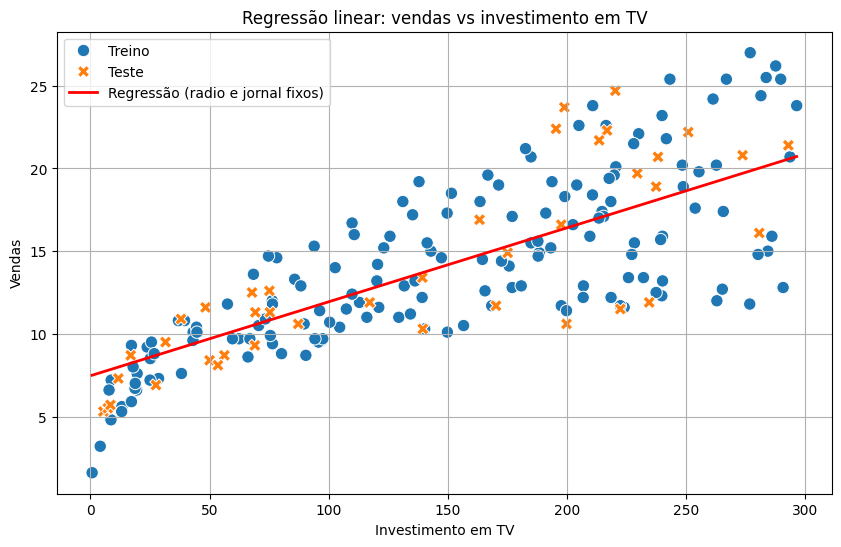

In [16]:
# Gráfico: Pontos de treino, teste e reta de regressão (vendas previstas vs vendas reais)
import matplotlib.pyplot as plt
import numpy as np

# Previsão completa (incluindo treino e teste juntos)
df_treino = pd.DataFrame(X_treino, columns=['TV', 'radio', 'newspaper'])
df_treino['sales_real'] = y_treino
df_treino['sales_pred'] = y_pred_treino
df_treino['tipo'] = 'Treino'

df_teste = pd.DataFrame(X_teste, columns=['TV', 'radio', 'newspaper'])
df_teste['sales_real'] = y_teste
df_teste['sales_pred'] = y_pred_teste
df_teste['tipo'] = 'Teste'

# Combinar treino e teste em um único DataFrame
df_plot = pd.concat([
    pd.DataFrame({'TV': X_treino['TV'], 'sales': y_treino, 'tipo': 'Treino'}),
    pd.DataFrame({'TV': X_teste['TV'], 'sales': y_teste, 'tipo': 'Teste'})
])

# Gerar pontos para a linha de regressão em função de TV
tv_range = np.linspace(df['TV'].min(), df['TV'].max(), 100).reshape(-1, 1)
radio_medio = df['radio'].mean()
jornal_medio = df['newspaper'].mean()
X_reg = pd.DataFrame({
    'TV': tv_range.ravel(),
    'radio': radio_medio,
    'newspaper': jornal_medio
})
y_reg = modelo.predict(X_reg)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='TV', y='sales', hue='tipo', style='tipo', s=80)
plt.plot(tv_range, y_reg, color='red', linewidth=2, label='Regressão (radio e jornal fixos)')
plt.title('Regressão linear: vendas vs investimento em TV')
plt.xlabel('Investimento em TV')
plt.ylabel('Vendas')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
# Novo conjunto de dados para previsão
novo_investimento = pd.DataFrame([[150, 22, 12]], columns=['TV', 'radio', 'newspaper'])
venda_prevista = modelo.predict(novo_investimento)
print(f"Vendas previstas: {venda_prevista[0]:.2f} mil unidades")

Vendas previstas: 13.88 mil unidades


In [18]:
# Múltiplos conjuntos
novos_investimentos = pd.DataFrame([
    [150, 22, 12],
    [200, 30, 20],
    [100, 15, 10]
], columns=['TV', 'radio', 'newspaper'])

vendas_previstas = modelo.predict(novos_investimentos)
for i, pred in enumerate(vendas_previstas):
    print(f"Conjunto {i+1}: Vendas previstas = {pred:.2f} mil unidades")

Conjunto 1: Vendas previstas = 13.88 mil unidades
Conjunto 2: Vendas previstas = 17.66 mil unidades
Conjunto 3: Vendas previstas = 10.32 mil unidades


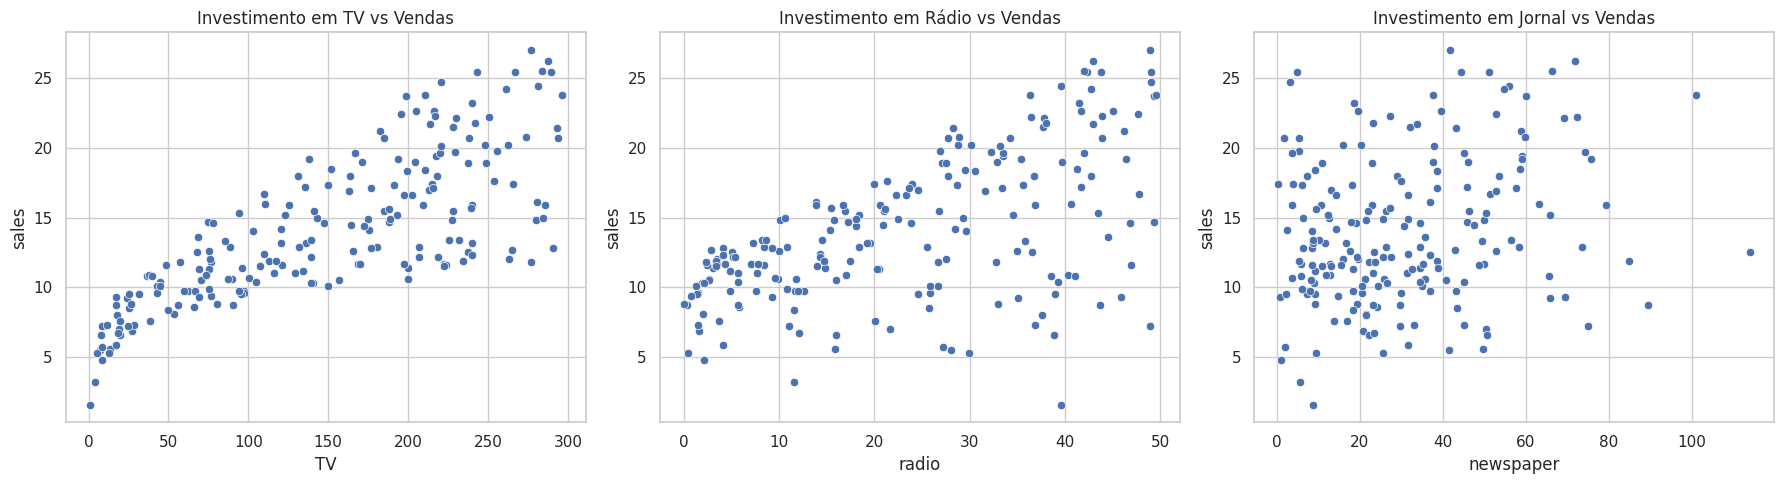

In [19]:
# Gráficos de dispersão
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='TV', y='sales', data=df, ax=axs[0])
axs[0].set_title('Investimento em TV vs Vendas')

sns.scatterplot(x='radio', y='sales', data=df, ax=axs[1])
axs[1].set_title('Investimento em Rádio vs Vendas')

sns.scatterplot(x='newspaper', y='sales', data=df, ax=axs[2])
axs[2].set_title('Investimento em Jornal vs Vendas')

plt.tight_layout()
plt.show()

### Exemplo 6

**Regressão linear multivariada com treino/teste: gráficos em 3D**

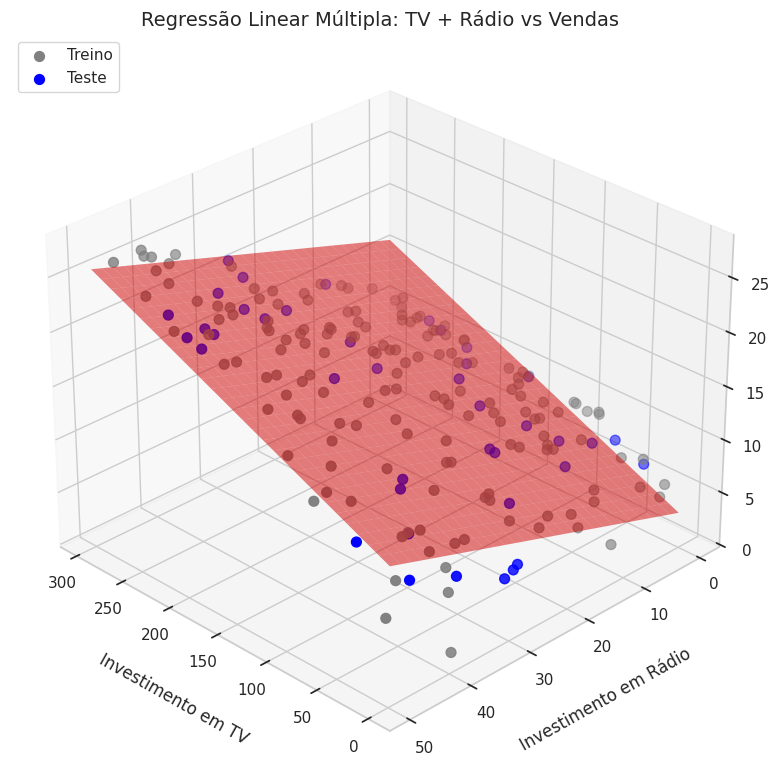

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Carregar os dados
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(url)

# Variáveis
X = df[['TV', 'radio']]
y = df['sales']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Grade para o plano
tv_range = np.linspace(df['TV'].min(), df['TV'].max(), 30)
radio_range = np.linspace(df['radio'].min(), df['radio'].max(), 30)
TV_grid, RADIO_grid = np.meshgrid(tv_range, radio_range)
X_grid = pd.DataFrame({'TV': TV_grid.ravel(), 'radio': RADIO_grid.ravel()})
SALES_pred = modelo.predict(X_grid).reshape(TV_grid.shape)

# Gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Pontos de treino e teste
ax.scatter(X_train['TV'], X_train['radio'], y_train, color='gray', label='Treino', s=50)
ax.scatter(X_test['TV'], X_test['radio'], y_test, color='blue', label='Teste', s=50)

# Superfície do plano
ax.plot_surface(TV_grid, RADIO_grid, SALES_pred, alpha=0.5, color='red', edgecolor='none')

# Rótulos e estilo
ax.set_xlabel('Investimento em TV', fontsize=12, labelpad=15)
ax.set_ylabel('Investimento em Rádio', fontsize=12, labelpad=15)
ax.set_zlabel('Vendas (mil unidades)', fontsize=13, labelpad=20)

# Ajuste de ângulo de visão
ax.view_init(elev=29, azim=135)  # elevação e rotação da câmera

# Título e legenda
ax.set_title('Regressão Linear Múltipla: TV + Rádio vs Vendas', fontsize=14)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


### Exemplo 7

**Regressão linear multivariada com treino/teste: gráfico em 3D interativo**

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go

# Carregar o dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(url)

# Variáveis independentes e dependente
X = df[['TV', 'radio']]
y = df['sales']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Grid para o plano de regressão
tv_range = np.linspace(df['TV'].min(), df['TV'].max(), 30)
radio_range = np.linspace(df['radio'].min(), df['radio'].max(), 30)
TV_grid, RADIO_grid = np.meshgrid(tv_range, radio_range)
X_grid = pd.DataFrame({
    'TV': TV_grid.ravel(),
    'radio': RADIO_grid.ravel()
})
SALES_pred = modelo.predict(X_grid).reshape(TV_grid.shape)

# Gráfico interativo
fig = go.Figure()

# Pontos de treino
fig.add_trace(go.Scatter3d(
    x=X_train['TV'], y=X_train['radio'], z=y_train,
    mode='markers',
    marker=dict(size=5, color='gray'),
    name='Treino'
))

# Pontos de teste
fig.add_trace(go.Scatter3d(
    x=X_test['TV'], y=X_test['radio'], z=y_test,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Teste'
))

# Plano de regressão
fig.add_trace(go.Surface(
    x=tv_range, y=radio_range, z=SALES_pred,
    colorscale='Reds',
    opacity=0.6,
    name='Plano de regressão'
))

# Layout
fig.update_layout(
    title='Regressão Linear Múltipla: TV + Rádio vs Vendas',
    scene=dict(
        xaxis_title='Investimento em TV',
        yaxis_title='Investimento em Rádio',
        zaxis_title='Vendas (mil unidades)',
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()
